# Prática 1
Passo 01

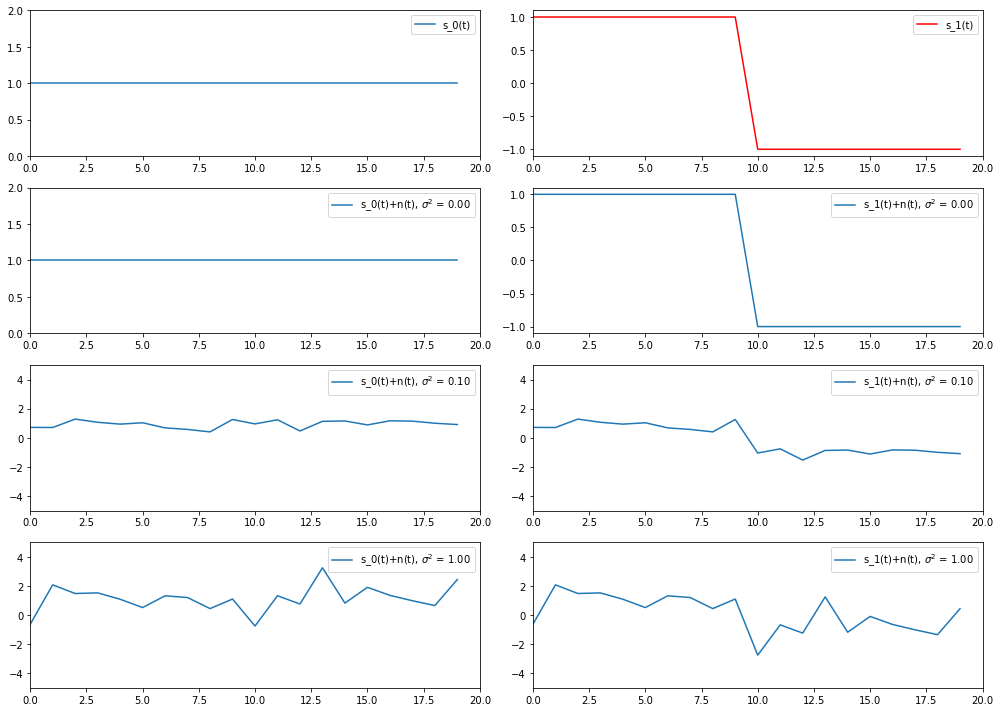

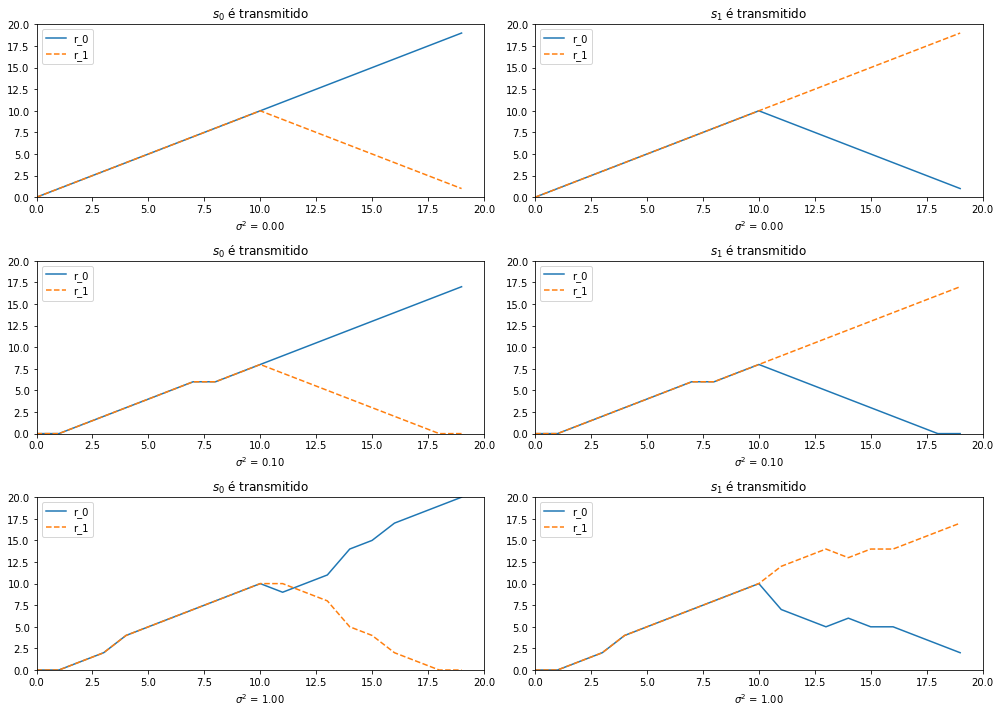

In [447]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt

#Parametros
k=20
l=np.arange(0,k,1)
s_0=np.ones((k,), dtype=np.int)
#Definindo forma de onda
s_1=np.ones((k,), dtype=np.int)
s_1[10::]=-1*s_1[10::]
#Inicializando sinais de saida do correlator
r_0=np.zeros((k,), dtype=np.int)
r_1=np.zeros((k,), dtype=np.int)
vtVar = [0, 0.1, 1]
#Figura para sinais no tempo

plt.figure(1,[14,10])
plt.subplot(4,2,1)
plt.plot(l,s_0)
plt.xlim([0,20])
plt.ylim([0,2])
plt.legend(["s_0(t)"])
plt.subplot(4,2,2)
plt.plot(l,s_1,'r')
plt.xlim([0,20])
plt.ylim([-1.1,1.1])

plt.legend(["s_1(t)"])


#Figura para saída dos correlatores

for ik in range(1,len(vtVar)+1):
    a=np.random.randn(1, 20)
    vtNoise = sqrt(vtVar[ik-1])*a[0][:]
#Sinal quando s_0 é Tx
    rs_0=s_0+vtNoise;
    #Correlacionando sinais 
    for n in range(0,k):
        r_0[n]=sum(rs_0[0:n]*s_0[0:n])
        r_1[n]=sum(rs_0[0:n]*s_1[0:n])
    #Grafico da autocorrelação
    plt.figure(2,[14,10])
    plt.subplot(3,2,2*ik-1)
    plt.plot(l,r_0,'-')
    plt.plot(l,r_1,'--')
    plt.legend(["r_0","r_1"])
    plt.xlabel('$\sigma^2$ = {:01.2f}'.format(vtVar[ik-1]))
    plt.title('$s_{0}$ é transmitido')
    plt.xlim([0,20])
    plt.ylim([0,20])
    
    
    plt.figure(1,[14,10])
    plt.subplot(4,2,2*(ik+1)-1)
    plt.plot(l,rs_0)
    plt.legend(["s_0(t)+n(t), "+'$\sigma^2$ = {:01.2f}'.format(vtVar[ik-1])])
   
    if((2*(ik+1)-1)==3):
        plt.xlim([0,20])
        plt.ylim([0,2]) 
    else:
        plt.xlim([0,20])
        plt.ylim([-5,5])
    
    
    #Sinal quando s_1 é Tx
    rs_1=s_1+vtNoise;
    #Correlacionando sinais 
    for n in range(0,k):
        r_0[n]=sum(rs_1[0:n]*s_0[0:n])
        r_1[n]=sum(rs_1[0:n]*s_1[0:n])
    #Grafico da autocorrelação
    plt.figure(2,[14,10])
    plt.subplot(3,2,2*ik)
    plt.plot(l,r_0,'-')
    plt.plot(l,r_1,'--')
    plt.legend(["r_0","r_1"])
    plt.xlabel('$\sigma^2$ = {:01.2f}'.format(vtVar[ik-1]))
    plt.title('$s_{1}$ é transmitido')
    plt.xlim([0,20])
    plt.ylim([0,20])
    plt.tight_layout()
    
    
    plt.figure(1,[14,10])
    plt.subplot(4,2,2*(ik+1))
    plt.plot(l,rs_1)
    plt.legend(["s_1(t)+n(t), "+'$\sigma^2$ = {:01.2f}'.format(vtVar[ik-1])])
    if((2*(ik+1))==4):
        plt.xlim([0,20])
        plt.ylim([-1.1,1.1]) 
    else:
        plt.xlim([0,20])
        plt.ylim([-5,5])
    plt.tight_layout()
    
    
plt.figure(1,[14,10])

plt.show()
plt.figure(2,[14,10])

plt.show()





# Prática 2
Passo 01

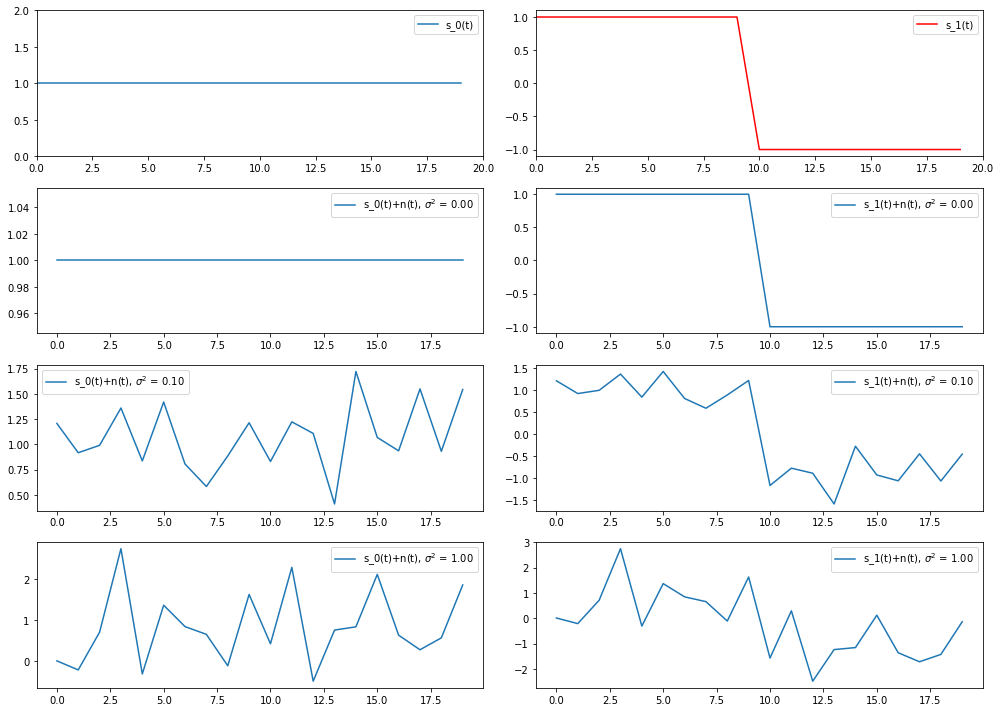

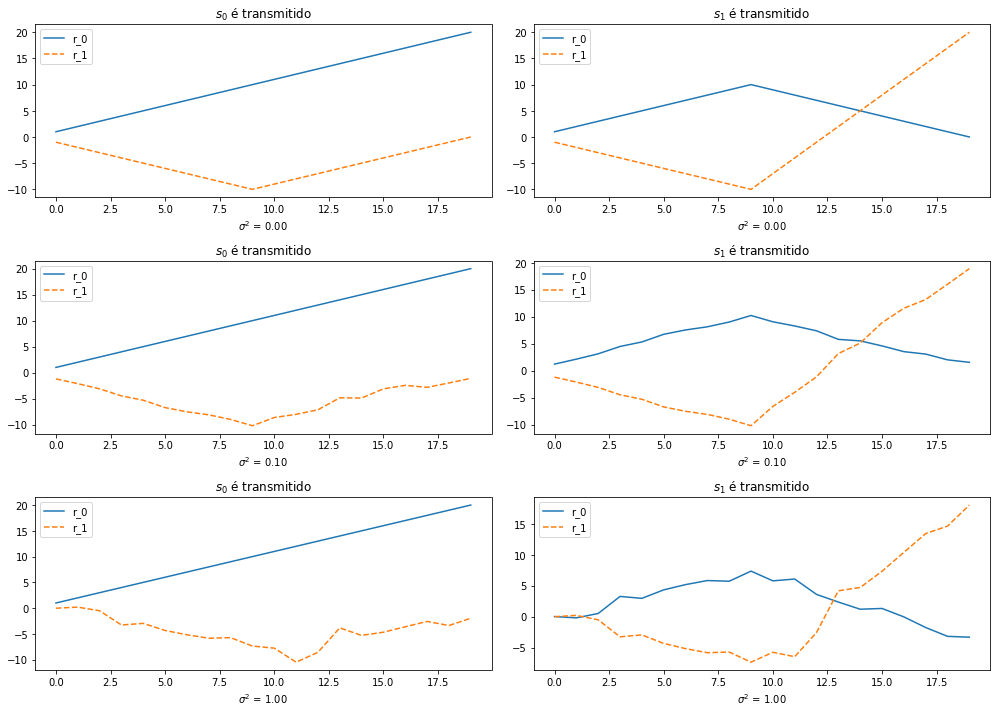

In [499]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt,ceil

#Parametros
k=20
l=np.arange(0,k,1)
s_0=np.ones((k,), dtype=np.int)
#Definindo forma de onda
s_1=np.ones((k,), dtype=np.int)
s_1[10::]=-1*s_1[10::]
S_1INV=np.ones((k,), dtype=np.int)
S_1INV[0:10]=-1*S_1INV[0:10]

#Inicializando sinais de saida do correlator
r_0=np.zeros((k,), dtype=np.int)
r_1=np.zeros((k,), dtype=np.int)
vtVar = [0, 0.1, 1]
#Figura para sinais no tempo

plt.figure(1,[14,10])
plt.subplot(4,2,1)
plt.plot(l,s_0)
plt.xlim([0,20])
plt.ylim([0,2])
plt.legend(["s_0(t)"])
plt.subplot(4,2,2)
plt.plot(l,s_1,'r')
plt.xlim([0,20])
plt.ylim([-1.1,1.1])

plt.legend(["s_1(t)"])


#Figura para saída dos correlatores

for ik in range(1,len(vtVar)+1):
    a=np.random.randn(1, 20)
    vtNoise = sqrt(vtVar[ik-1])*a[0][:]
#Sinal quando s_0 é Tx
    rs_0=s_0+vtNoise;
    
#Filtro casado
############# r_0=np.convolve(rs_0,r_0) não deu certo ##############
############# r_0=r_0[0:ceil(len(r_0)/2)]             ##############
    r_0=np.arange(1,21,1)
    r_1=np.convolve(rs_0,S_1INV)
    r_1=r_1[0:ceil(len(r_1)/2)]
    
#Grafico da autocorrelação
    
    plt.figure(2,[14,10])
    plt.subplot(3,2,2*ik-1)
    plt.plot(l,r_0,'-')
    plt.plot(l,r_1,'--')
    plt.legend(["r_0","r_1"])
    plt.xlabel('$\sigma^2$ = {:01.2f}'.format(vtVar[ik-1]))
    plt.title('$s_{0}$ é transmitido')
    
    
    
    plt.figure(1,[14,10])
    plt.subplot(4,2,2*(ik+1)-1)
    plt.plot(l,rs_0)
    plt.legend(["s_0(t)+n(t), "+'$\sigma^2$ = {:01.2f}'.format(vtVar[ik-1])])
    
   
    
    
    
#Sinal quando s_1 é Tx
    rs_1=s_1+vtNoise;
    r_0=np.convolve(rs_1,s_0)
    r_0=r_0[0:ceil(len(r_0)/2)]
    r_1=np.convolve(rs_1,S_1INV)
    r_1=r_1[0:ceil(len(r_1)/2)]
    
    #Grafico da autocorrelação
    plt.figure(2,[14,10])
    plt.subplot(3,2,2*ik)
    plt.plot(l,r_0,'-')
    plt.plot(l,r_1,'--')
    plt.legend(["r_0","r_1"])
    plt.xlabel('$\sigma^2$ = {:01.2f}'.format(vtVar[ik-1]))
    plt.title('$s_{1}$ é transmitido')
    
    plt.tight_layout()
    
    
    plt.figure(1,[14,10])
    plt.subplot(4,2,2*(ik+1))
    plt.plot(l,rs_1)
    plt.legend(["s_1(t)+n(t), "+'$\sigma^2$ = {:01.2f}'.format(vtVar[ik-1])])
    
    plt.tight_layout()
    
    
plt.figure(1,[14,10])

plt.show()
plt.figure(2,[14,10])

plt.show()





# Prática 3
Passo 01

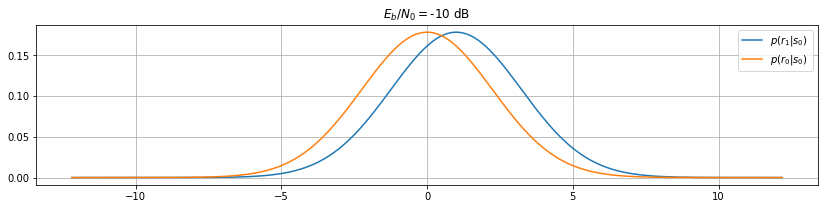

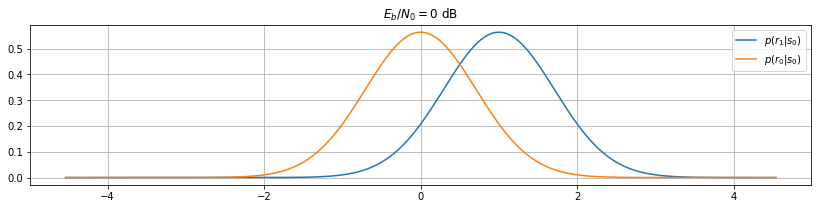

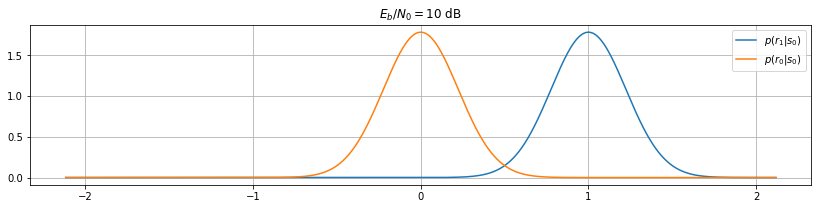

In [541]:
from scipy.stats import norm
Eb=1
Er0=Eb
Er1=0
vtEbN0_dB=[-10, 0, 10]
vtEbN0=[0, 0, 0]
vtVar=[0, 0, 0]
for il in range(0, len(vtEbN0_dB)):
    vtEbN0[il]=10**(vtEbN0_dB[il]/10)
    vtVar[il]=Eb*Eb/vtEbN0[il]/2

for ik in range(0,len(vtEbN0_dB)):
    dstd=sqrt(vtVar[ik])
    x=np.arange(-5*dstd-Eb,5*dstd+Eb,0.001)
    vtr_0=norm.pdf(x,Er0,dstd)
    vtr_1=norm.pdf(x,Er1,dstd)
    plt.figure(1,[14,10])
    plt.subplot(len(vtEbN0_dB),1,ik+1)
    plt.plot(x,vtr_0,x,vtr_1)
    plt.title('$E_b/N_0 =$'+str(vtEbN0_dB[ik])+' dB')
    plt.legend(['$p(r_{1}|s_0)$ ','$p(r_{0}|s_0)$'])
    plt.grid()
    plt.show()

# Prática 4
Passo 01

In [550]:

vtEbN0_dB=np.arange(-10,10,0.5)
vtEbN0=10**(vtEbN0_dB/10)
#vtPe=np.qfunc
plt.figure(1[14,10])
plt.semilogx(vtEbN0)
plt.show

TypeError: 'int' object is not subscriptable